In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import optimizers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score, roc_curve, recall_score, precision_score
print(tf.__version__)

2.13.0


# data preprocessing and split

In [2]:
data = pd.read_csv('/Users/ujong-yun/Documents/학부연구생/학부연구생 - dataset 공유 (csv).csv')
data = data.dropna()
data

,Case,Engine Speed,Spark Timing,Throttle Angle,Ambient Temperature,Intake Pressure,Intake Temperature,Exhaust Pressure,Exhaust Temperature,Injected Mass,Maximum Pressure,Crank Angle at Maximum Pressure,Maximum Rate of Pressure Rise,BMEP,IMEP,BSFC,BSNOx,BSCO,Knocking Index,Knocking
1,0.0,1000,-30,30,283,0.988,292.1,1.019,671.9,33.27,67.2,3.69,4.31,6.55,7.48,364,4.06,245.1,469.0,1.0
2,1.0,1000,-30,30,293,0.988,297.4,1.019,671.1,33.15,66.9,3.73,4.29,6.52,7.42,365.9,3.94,250.8,477.0,1.0
3,2.0,1000,-30,30,303,0.988,302.6,1.019,670.9,33.03,66.6,3.76,4.26,6.48,7.38,367.1,3.89,253.8,485.0,1.0
4,3.0,1000,-30,35,283,0.991,292.3,1.02,673.2,33.57,67.8,3.3,4.42,6.59,7.51,365.4,4.2,246.9,454.0,1.0
5,4.0,1000,-30,35,293,0.991,297.4,1.02,672.2,33.44,67.5,3.34,4.39,6.55,7.46,367.5,4.05,253.2,461.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,2140.0,6000,-10,85,293,0.969,294.1,1.493,1088.4,48.07,33.1,36.97,0.78,8.13,10.29,426,1.73,403,0.0,0.0
2142,2141.0,6000,-10,85,303,0.969,301.6,1.488,1089.5,47.74,33.3,36.99,0.78,8.08,10.27,425.9,1.81,402.8,0.0,0.0
2143,2142.0,6000,-10,90,283,0.97,286.6,1.498,1088.9,48.4,32.9,37.96,0.78,8.2,10.31,424.8,1.72,399.2,0.0,0.0
2144,2143.0,6000,-10,90,293,0.969,294.1,1.493,1088.5,48.08,33.1,36.97,0.78,8.14,10.29,425.9,1.74,402.7,0.0,0.0


In [3]:
len_0 = len(data.loc[data['Knocking'] == 0])
len_1 = len(data.loc[data['Knocking'] == 1])
print(len_0)
print(len_1)

1064
1081


In [4]:
X_data = data.loc[:, ['Engine Speed', 'Spark Timing', 'Throttle Angle', 'Ambient Temperature', 
                                   'Intake Pressure', 'Intake Temperature','Exhaust Pressure', 'Exhaust Temperature', 'Injected Mass']]
y_data = data['Knocking']
print(X_data)
print(y_data)

     Engine Speed Spark Timing Throttle Angle Ambient Temperature   
1            1000          -30             30                 283  \
2            1000          -30             30                 293   
3            1000          -30             30                 303   
4            1000          -30             35                 283   
5            1000          -30             35                 293   
...           ...          ...            ...                 ...   
2141         6000          -10             85                 293   
2142         6000          -10             85                 303   
2143         6000          -10             90                 283   
2144         6000          -10             90                 293   
2145         6000          -10             90                 303   

     Intake Pressure Intake Temperature Exhaust Pressure Exhaust Temperature   
1              0.988              292.1            1.019               671.9  \
2          

In [5]:
train_input, test_input, train_output, test_output = train_test_split(X_data, y_data,test_size=0.2, shuffle=True, random_state=42)
train_input, val_input, train_output, val_output = train_test_split(train_input, train_output, test_size = 0.25, shuffle=True, random_state=42) # train, validation, test 비율 조정, 함수 만들어 보기
print(train_input.shape)
print(train_output.shape)
print(val_input.shape)
print(val_output.shape)
print(test_input.shape)
print(test_output.shape)


(1287, 9)
(1287,)
(429, 9)
(429,)
(429, 9)
(429,)


In [6]:

ss = StandardScaler()
ss.fit(train_input)
train_scale = ss.transform(train_input)
val_scale = ss.transform(val_input)
test_scale = ss.transform(test_input)
print(train_scale)
print(val_scale)
print(test_scale)

[[ 0.94116682 -1.42752381 -0.27742293 ...  0.8590414   0.36974684
   0.96453667]
 [ 1.57418573 -1.42752381 -0.80834236 ...  1.1903374   0.59817701
   0.32597037]
 [ 0.3081479  -0.01318729  0.78441592 ...  0.3068814   0.39817806
   0.87128571]
 ...
 [ 1.57418573  1.40114924 -1.07380208 ...  1.58053047  2.0579733
   0.10500616]
 [-1.27439938 -0.72035555  0.78441592 ... -1.15082099 -1.44789072
  -1.15185449]
 [-0.95788993 -0.72035555  0.78441592 ... -1.01094046 -0.7988745
  -0.74438837]]
[[-1.27439938  1.40114924 -1.33926179 ... -1.12873459 -0.8371096
  -1.51269512]
 [-1.59090884  1.40114924  0.51895621 ... -1.32015006 -1.63710542
  -1.84515504]
 [-0.95788993 -1.42752381 -1.33926179 ... -1.03302686 -0.93024637
  -0.91264552]
 ...
 [-0.95788993 -1.42752381 -0.27742293 ... -1.02566473 -0.88122701
  -0.80520421]
 [ 1.57418573 -0.72035555 -1.33926179 ...  0.94002487  0.77562707
  -0.35719421]
 [-0.32487101 -0.72035555 -0.27742293 ... -0.488229   -0.31848486
   0.2408282 ]]
[[ 0.3081479   1.40

# DNN Model 

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape = (9,)))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1000      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2021 (7.89 KB)
Trainable params: 2021 (7.89 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-14 11:09:58.161846: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-14 11:09:58.161874: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-14 11:09:58.161882: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-14 11:09:58.162119: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-14 11:09:58.162142: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
initial_learning_rate = 0.01
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)

In [9]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best-classification-model.h5')
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_scale, train_output, epochs=1000, batch_size = 64, validation_data=(val_scale, val_output), callbacks=[callback, checkpoint_cb])


Epoch 1/1000


2024-03-14 11:09:58.728844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - ETA: 0s - loss: 0.7031 - accuracy: 0.5897

2024-03-14 11:09:59.667080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


21/21 [==============================] - 1s 37ms/step - loss: 0.7031 - accuracy: 0.5897 - val_loss: 0.4307 - val_accuracy: 0.8648
Epoch 2/1000
10/21 [=============>................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8406

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


21/21 [==============================] - 0s 16ms/step - loss: 0.3801 - accuracy: 0.8547 - val_loss: 0.3132 - val_accuracy: 0.9138
Epoch 3/1000
21/21 [==============================] - 0s 16ms/step - loss: 0.3003 - accuracy: 0.8889 - val_loss: 0.2681 - val_accuracy: 0.9138
Epoch 4/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.2666 - accuracy: 0.8943 - val_loss: 0.2461 - val_accuracy: 0.9068
Epoch 5/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.2492 - accuracy: 0.8959 - val_loss: 0.2320 - val_accuracy: 0.9021
Epoch 6/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.2355 - accuracy: 0.8990 - val_loss: 0.2208 - val_accuracy: 0.9044
Epoch 7/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.2257 - accuracy: 0.8920 - val_loss: 0.2246 - val_accuracy: 0.9021
Epoch 8/1000
21/21 [==============================] - 0s 15ms/step - loss: 0.2256 - accuracy: 0.9005 - val_loss: 0.2097 - val_accuracy: 0.9091
Epoch 9/1000

In [10]:
model.save('best-classification-model.h5')
model = keras.models.load_model('best-classification-model.h5')

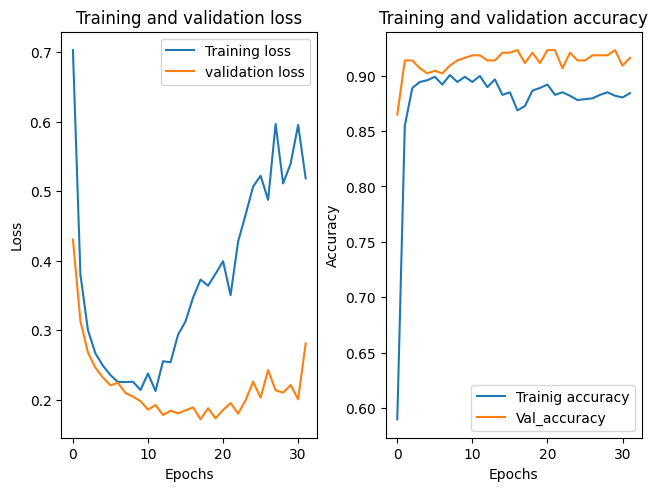

In [11]:
history_dic = history.history
loss = history_dic['loss']
val_loss = history_dic['val_loss']
accuracy = history_dic['accuracy']
val_accuracy = history_dic['val_accuracy']
fig, axs= plt.subplots(1, 2, constrained_layout = True)
axs[0].plot(loss, label = 'Training loss')
axs[0].plot(val_loss, label = 'validation loss')
axs[1].plot(accuracy, label = 'Trainig accuracy')
axs[1].plot(val_accuracy, label = 'Val_accuracy')
axs[0].set_title('Training and validation loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[1].set_title('Training and validation accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[0].legend()
axs[1].legend()
plt.show()
# loss값 파일 저장 및 출력 필요


In [12]:
loss_accuracy_df = pd.DataFrame(((loss[i], val_loss[i], accuracy[i], val_accuracy[i]) for i in range(len(history.epoch))), columns=['Loss', 'Val_Loss', 'Accuracy', 'Val_Accuracy'])
loss_accuracy_df

,Loss,Val_Loss,Accuracy,Val_Accuracy
0,0.703115,0.430682,0.589744,0.864802
1,0.380084,0.313220,0.854701,0.913753
2,0.300349,0.268076,0.888889,0.913753
3,0.266650,0.246097,0.894328,0.906760
4,0.249170,0.232019,0.895882,0.902098
5,0.235522,0.220817,0.898990,0.904429
6,0.225673,0.224579,0.891997,0.902098
7,0.225555,0.209708,0.900544,0.909091
8,0.226047,0.204673,0.894328,0.913753
9,0.214213,0.198117,0.898990,0.916084


In [13]:
loss_accuracy_df.to_csv('loss_and_accuracy.csv', index=True)

In [14]:
loss_and_accuracy_test = model.evaluate(test_scale, test_output)
loss_and_accuracy_train = model.evaluate(train_scale, train_output)
loss_and_accuracy_val = model.evaluate(val_scale, val_output)
print(loss_and_accuracy_test)
print(loss_and_accuracy_train)
print(loss_and_accuracy_val)
print('loss = ', loss_and_accuracy_test[0])
print('loss = ', loss_and_accuracy_train[0])
print('loss = ', loss_and_accuracy_val[0])
print('accuracy = ', loss_and_accuracy_train[1])
print('accuracy = ', loss_and_accuracy_val[1])
print('accuracy = ', loss_and_accuracy_test[1])

10/14 [====================>.........] - ETA: 0s - loss: 0.1592 - accuracy: 0.9312

2024-03-14 11:10:11.117911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 9ms/step - loss: 0.1925 - accuracy: 0.9184
[0.1830066293478012, 0.9160839319229126]
[0.16053076088428497, 0.9222999215126038]
[0.1924685388803482, 0.9184148907661438]
loss =  0.1830066293478012
loss =  0.16053076088428497
loss =  0.1924685388803482
accuracy =  0.9222999215126038
accuracy =  0.9184148907661438
accuracy =  0.9160839319229126


In [15]:
predicted_test = model.predict(test_scale)
predicted_train = model.predict(train_scale)
predicted_val = model.predict(val_scale)


28/41 [===================>..........] - ETA: 0s

2024-03-14 11:10:12.090511: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 2ms/step


0.9159
0.9205
0.9231


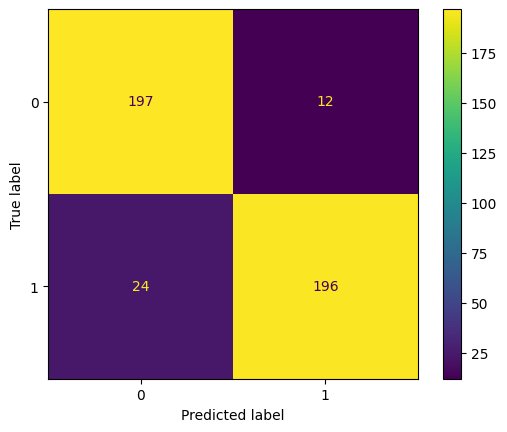

In [16]:
#Confusion matrix
predicted_test = np.array([1 if x >= 0.5 else 0 for x in predicted_test])
predicted_train = np.array([1 if x >= 0.5 else 0 for x in predicted_train])
predicted_val = np.array([1 if x >= 0.5 else 0 for x in predicted_val])

actual_test = np.array(test_output)
actual_train = np.array(train_output)
actual_val = np.array(val_output)

conf_matrix = confusion_matrix(actual_test, predicted_test)
display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
display.plot()

#f1-score
print(round(f1_score(actual_test, predicted_test), 4))
print(round(f1_score(actual_train, predicted_train), 4))
print(round(f1_score(actual_val, predicted_val), 4))

In [17]:
print(predicted_test)
print(predicted_train)
print(predicted_val)

[0 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0
 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1
 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1
 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 0 1
 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0]
[1 1 0 ... 0 1 1]
[0 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1
 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0

In [18]:
test_df = pd.DataFrame(((predicted_test[i]) for i in range(len(test_output))), columns=['Predicted_test'], index = test_output.index)
test_df['Raw_test'] = (test_output)
test_df

,Predicted_test,Raw_test
1345,0,0.0
1935,0,0.0
129,1,1.0
333,1,1.0
1164,0,0.0
...,...,...
545,1,1.0
1201,1,1.0
509,0,1.0
1333,0,0.0


In [19]:
train_df = pd.DataFrame(((predicted_train[i]) for i in range(len(train_output))), columns=['Predicted_train'], index = train_output.index)
train_df['Raw_train'] = (train_output)
train_df

,Predicted_train,Raw_train
1578,1,1.0
1962,1,0.0
1278,0,0.0
58,1,1.0
94,1,1.0
...,...,...
2109,0,0.0
471,1,1.0
2113,0,0.0
263,1,1.0


In [20]:
validation_df = pd.DataFrame(((predicted_val[i]) for i in range(len(val_output))), columns=['Predicted_val'], index = val_output.index)
validation_df['Raw_validation'] = (val_output)
validation_df

,Predicted_val,Raw_validation
356,0,1.0
181,1,1.0
395,1,1.0
1487,0,0.0
168,1,1.0
...,...,...
524,0,1.0
1137,0,0.0
407,1,1.0
1993,0,0.0


In [21]:
test_df.to_csv('Test_df.csv', index=True)
train_df.to_csv('Train_df.csv', index=True)
validation_df.to_csv('Validation_df.csv', index=True)

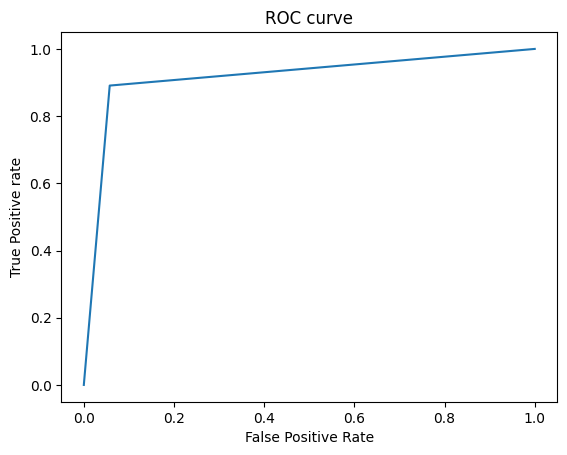

0.9167464114832535


In [22]:
#ROC CURVE
fpr, tpr, thresh = roc_curve(actual_test, predicted_test, pos_label=1)
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()
    
#AUC    
auc_score1 = roc_auc_score(actual_test, predicted_test)
print(auc_score1)

In [23]:
print(round(recall_score(test_output, predicted_test), 4))
print(round(recall_score(train_output, predicted_train), 4))
print(round(recall_score(val_output, predicted_val), 4))

0.8909
0.9161
0.917


In [24]:
print(round(precision_score(test_output, predicted_test), 4))
print(round(precision_score(train_output, predicted_train), 4))
print(round(precision_score(val_output, predicted_val), 4))

0.9423
0.9249
0.9292


In [25]:
data = [[round(loss_and_accuracy_test[0], 4), round(loss_and_accuracy_train[1], 4), round(recall_score(test_output, predicted_test), 4), round(precision_score(test_output, predicted_test), 4), round(f1_score(actual_test, predicted_test), 4)],
        [round(loss_and_accuracy_train[0], 4), round(loss_and_accuracy_train[1], 4),round(recall_score(train_output, predicted_train), 4), round(precision_score(train_output, predicted_train), 4), round(f1_score(actual_train, predicted_train), 4)],
        [round(loss_and_accuracy_val[0], 4), round(loss_and_accuracy_val[1], 4),round(recall_score(val_output, predicted_val), 4), round(precision_score(val_output, predicted_val), 4), round(f1_score(actual_val, predicted_val), 4)]]
index = ['Loss', 'Accuracy', 'Recall', 'Precision', 'F1_score']
print(data)


[[0.183, 0.9223, 0.8909, 0.9423, 0.9159], [0.1605, 0.9223, 0.9161, 0.9249, 0.9205], [0.1925, 0.9184, 0.917, 0.9292, 0.9231]]


In [26]:
metrics_df = pd.DataFrame(data, columns = index, index= ['Test', 'Train', 'Validation'])
metrics_df.to_csv('Binary_Classification_Metrics.csv')
metrics_df

,Loss,Accuracy,Recall,Precision,F1_score
Test,0.1830,0.9223,0.8909,0.9423,0.9159
Train,0.1605,0.9223,0.9161,0.9249,0.9205
Validation,0.1925,0.9184,0.9170,0.9292,0.9231


In [27]:
'''
import random
from itertools import product

params_list = []
hidden_layer_list = [1, 2, 3, 4]
hidden_units_list = [200, 100, 50, 10]
dropout_rate_list = [0.1, 0.2, 0.3, 0.4]
learning_rate_list = [0.1, 0.001, 0.0001]
batch_size_list = [64, 32, 16, 8]


a_list = []
b_list = []

for i in hidden_layer_list:
    a = list(product(hidden_units_list, repeat = i))
    b = list(product(dropout_rate_list, repeat = i))
    a_list.append(a)
    b_list.append(b)
print(a_list)
print(b_list)

best_accuracy = 0

model = keras.Sequential()

for i in hidden_units_list:
    for j in dropout_rate_list:
        for _ in hidden_layer_list:
            model.add(keras.layers.Dense(hidden_units_list[i], activation='relu', input_shape = (9, )))
            model.add(keras.layers.Dropout(dropout_rate_list[j]))
            model.add(keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=tf.keras.optimizers.legacy.Adam())
'''


"\nimport random\nfrom itertools import product\n\nparams_list = []\nhidden_layer_list = [1, 2, 3, 4]\nhidden_units_list = [200, 100, 50, 10]\ndropout_rate_list = [0.1, 0.2, 0.3, 0.4]\nlearning_rate_list = [0.1, 0.001, 0.0001]\nbatch_size_list = [64, 32, 16, 8]\n\n\na_list = []\nb_list = []\n\nfor i in hidden_layer_list:\n    a = list(product(hidden_units_list, repeat = i))\n    b = list(product(dropout_rate_list, repeat = i))\n    a_list.append(a)\n    b_list.append(b)\nprint(a_list)\nprint(b_list)\n\nbest_accuracy = 0\n\nmodel = keras.Sequential()\n\nfor i in hidden_units_list:\n    for j in dropout_rate_list:\n        for _ in hidden_layer_list:\n            model.add(keras.layers.Dense(hidden_units_list[i], activation='relu', input_shape = (9, )))\n            model.add(keras.layers.Dropout(dropout_rate_list[j]))\n            model.add(keras.layers.Dense(1, activation='sigmoid'))\n    model.compile(optimizer=tf.keras.optimizers.legacy.Adam())\n"

# Hyperparameters Tuning

In [34]:
from sklearn.model_selection import ParameterGrid

# 하이퍼파라미터 그리드 정의
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'dropout_rate': [0.1, 0.2, 0.3],
    'hidden_layers': [1, 2, 3],
    'hidden_units': [50, 100, 200],
    'batch_size' : [64, 32, 16]
}

# 하이퍼파라미터 그리드를 순회하며 그리드 서치 실행
best_accuracy = 0
best_params = {}
new_df = pd.DataFrame()

for params in ParameterGrid(param_grid):
    print("Training with parameters:", params)
    
    # 모델 생성
    model = keras.Sequential()
    model.add(keras.layers.Dense(params['hidden_units'], activation='relu', input_shape=(9,)))
    model.add(keras.layers.Dropout(params['dropout_rate']))
    
    for _ in range(params['hidden_layers']):
        model.add(keras.layers.Dense(params['hidden_units'], activation='relu'))
        model.add(keras.layers.Dropout(params['dropout_rate']))
    
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    # 모델 컴파일
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    # 모델 훈련
    history = model.fit(train_scale, train_output, epochs=1000, batch_size=params['batch_size'], 
                        validation_data=(val_scale, val_output), 
                        callbacks=[callback, checkpoint_cb],
                        verbose=0)
    
    # 검증 세트에 대한 정확도 계산
    val_accuracy_and_loss = model.evaluate(val_scale, val_output, verbose=0)
    print("Validation loss :", val_accuracy_and_loss[0])
    print("Validation accuracy : ", val_accuracy_and_loss[1])

    data_params = [params['learning_rate'], params['dropout_rate'], params['hidden_layers'], params['hidden_units'], params['batch_size'], val_accuracy_and_loss[0], val_accuracy_and_loss[1]]
    params_df = pd.DataFrame({"Learning_Rate" : [params['learning_rate']], 'Dropout_Rate' : [params['dropout_rate']], "Hidden_units" : [params['hidden_units']], "Batch_size" : [params['batch_size']], "Validation_Loss" : [val_accuracy_and_loss[0]], "Validation_Accuracy" : [val_accuracy_and_loss[1]]})
    new_df = pd.concat([new_df, params_df], ignore_index = True)

    # 최적의 하이퍼파라미터와 정확도 업데이트
    if val_accuracy_and_loss[0] > best_accuracy:
        best_accuracy = val_accuracy_and_loss[0]
        best_params = params
    model.save_weights('best-hyperparameters.h5')
    
print("Best parameters:", best_params)
print("Best validation accuracy:", best_accuracy)



Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:21:00.071981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:01.198753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Validation loss : 0.18429674208164215
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:21:10.820792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:11.983927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17378216981887817
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:21:19.288506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:20.380496: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.6924505233764648
Validation accuracy :  0.750582754611969
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:21:27.522242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:28.689473: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17108872532844543
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:21:38.730539: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:39.927651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.9566518664360046
Validation accuracy :  0.7552447319030762
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:21:47.586718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:48.717740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 2.3771910667419434
Validation accuracy :  0.8881118893623352
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:21:55.869568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:21:57.109445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16416029632091522
Validation accuracy :  0.9277389049530029
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:22:05.618931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:22:06.739882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.5733663439750671
Validation accuracy :  0.8368298411369324
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:22:14.353521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:22:15.624259: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 8.627307891845703
Validation accuracy :  0.8951048851013184
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:22:22.752936: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:22:24.285633: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.15848016738891602
Validation accuracy :  0.9324009418487549
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:22:33.848739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:22:35.390398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.23932603001594543
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:22:43.341066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:22:44.820697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 8.740864753723145
Validation accuracy :  0.8578088283538818
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:22:52.768080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:22:54.291533: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18601569533348083
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:23:02.905241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:23:04.424949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.47019073367118835
Validation accuracy :  0.881118893623352
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:23:12.673977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:23:14.174744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 79.60014343261719
Validation accuracy :  0.8275058269500732
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:23:21.966307: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:23:23.504861: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20128802955150604
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:23:31.875144: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:23:33.467342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.9409327507019043
Validation accuracy :  0.811188817024231
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:23:41.454738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:23:43.001922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 701.6318969726562
Validation accuracy :  0.8414918184280396
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:23:51.143671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:23:53.244828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19089637696743011
Validation accuracy :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:24:03.098116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:24:05.132777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.5576832890510559
Validation accuracy :  0.8298368453979492
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:24:14.284396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:24:16.662341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 41.75017166137695
Validation accuracy :  0.7762237787246704
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:24:26.020903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:24:28.534765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19867026805877686
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:24:38.345910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:24:40.839447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3157676160335541
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:24:50.308604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:24:52.892916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 366.2060852050781
Validation accuracy :  0.6643356680870056
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:25:02.410034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:25:04.939784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.30386415123939514
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:25:15.050103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:25:17.577608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.7615435123443604
Validation accuracy :  0.8578088283538818
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:25:27.434558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:25:29.997932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 44423.37890625
Validation accuracy :  0.8438228368759155
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:25:42.145424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:25:43.778709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16552746295928955
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:25:53.845043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:25:55.547223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1752605438232422
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:26:03.708346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:26:05.437178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.4123879671096802
Validation accuracy :  0.883449912071228
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:26:13.076025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:26:14.767116: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19158920645713806
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:26:25.409066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:26:27.248163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.33375033736228943
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:26:35.337776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:26:37.116571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3.2236721515655518
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:26:45.158529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:26:47.039441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17323607206344604
Validation accuracy :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:26:55.356489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:26:57.267173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.29165640473365784
Validation accuracy :  0.8997669219970703
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:27:05.360847: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:27:07.273813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 34.69442367553711
Validation accuracy :  0.8368298411369324
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:27:15.408992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:27:17.715338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1851806789636612
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:27:27.939280: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:27:30.213298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20042668282985687
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:27:39.049375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:27:41.291770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 7.157870292663574
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:27:50.089829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:27:52.505993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16899847984313965
Validation accuracy :  0.9230769276618958
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:28:01.778282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:28:04.044568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2872779369354248
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:28:12.979923: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:28:15.387892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 13.46578311920166
Validation accuracy :  0.8764568567276001
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:28:24.350381: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:28:26.822068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16155032813549042
Validation accuracy :  0.9230769276618958
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:28:36.356012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:28:38.750409: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.29411551356315613
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:28:47.883199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:28:50.127525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 289.5208740234375
Validation accuracy :  0.8951048851013184
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:28:58.929168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:29:01.539885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1872916966676712
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:29:11.969720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:29:14.427966: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.35878291726112366
Validation accuracy :  0.8881118893623352
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:29:23.892697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:29:26.390275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 400.6495056152344
Validation accuracy :  0.2960372865200043
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:29:36.092913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:29:38.725525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17654527723789215
Validation accuracy :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:29:49.054812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:29:51.812275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.322777509689331
Validation accuracy :  0.7738927602767944
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:30:01.482992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:30:04.036005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 482.5060119628906
Validation accuracy :  0.7738927602767944
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:30:14.192319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:30:17.219797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20974262058734894
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:30:30.129169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:30:33.340158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.8263697028160095
Validation accuracy :  0.8741258978843689
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:30:43.732800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:30:46.694343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 6470.54296875
Validation accuracy :  0.9020978808403015
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:30:56.638086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:30:58.926639: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17990602552890778
Validation accuracy :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:31:10.589037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:31:12.751221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19667953252792358
Validation accuracy :  0.8997669219970703
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:31:21.550719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:31:23.986976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 2.8904030323028564
Validation accuracy :  0.8298368453979492
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:31:32.691882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:31:35.312164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16348545253276825
Validation accuracy :  0.9230769276618958
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:31:45.838528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:31:48.484076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19063134491443634
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:31:56.944723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:31:59.300888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 8.155594825744629
Validation accuracy :  0.8298368453979492
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:32:07.813982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:32:09.958738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.15556225180625916
Validation accuracy :  0.9277389049530029
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:32:19.419758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:32:21.849271: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.279255211353302
Validation accuracy :  0.8881118893623352
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:32:30.246485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:32:32.802224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4.883139610290527
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:32:41.501756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:32:44.349685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1882178634405136
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:32:55.790553: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:32:58.156486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2189403623342514
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:33:07.520034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:33:09.763267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 7.319791316986084
Validation accuracy :  0.883449912071228
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:33:19.333322: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:33:21.945325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1616273671388626
Validation accuracy :  0.9324009418487549
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:33:32.030314: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:33:35.264195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.22351627051830292
Validation accuracy :  0.9184148907661438
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:33:44.838167: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:33:47.859082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 21.601633071899414
Validation accuracy :  0.883449912071228
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:33:57.538758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:34:00.325353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17662547528743744
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:34:10.403321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:34:13.802944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.1684280633926392
Validation accuracy :  0.8251748085021973
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:34:24.082667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:34:27.629298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 341.37841796875
Validation accuracy :  0.8368298411369324
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:34:37.552304: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:34:41.668171: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20496360957622528
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:34:53.907625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:34:57.852316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18534520268440247
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:35:08.765193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:35:12.438632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 85.76435089111328
Validation accuracy :  0.8344988226890564
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:35:23.487482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:35:27.815720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17166458070278168
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:35:40.035702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:35:43.989517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.7659696340560913
Validation accuracy :  0.8344988226890564
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:35:54.981810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:35:59.199991: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 955.6358642578125
Validation accuracy :  0.8344988226890564
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:36:10.911816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:36:18.459649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20283088088035583
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:36:29.868052: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:36:33.846163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3694095313549042
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:36:45.743334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:36:49.596414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 10385.37109375
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:37:01.140649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:37:04.948170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18746210634708405
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:37:21.319607: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:37:24.675704: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18374477326869965
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:37:38.811142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:37:42.117910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 6.222118854522705
Validation accuracy :  0.7995337843894958
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:37:55.703819: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:37:59.543402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.168283149600029
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:38:15.620199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:38:19.206138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19255515933036804
Validation accuracy :  0.9277389049530029
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:38:32.635712: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:38:36.186342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 5.039335250854492
Validation accuracy :  0.8927738666534424
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:38:49.700205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:38:53.518850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.15481039881706238
Validation accuracy :  0.9300699234008789
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:39:08.291483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:39:11.758222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20091795921325684
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:39:25.612451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:39:29.059444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 75.39545440673828
Validation accuracy :  0.8601398468017578
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:39:42.605034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:39:46.731279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.22036011517047882
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:40:02.214205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:40:06.402684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.31604570150375366
Validation accuracy :  0.883449912071228
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:40:21.527346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:40:25.911825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 34.607391357421875
Validation accuracy :  0.8554778695106506
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:40:40.447466: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:40:44.665163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18452802300453186
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:41:00.378014: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:41:04.684236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.41915014386177063
Validation accuracy :  0.8601398468017578
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:41:19.855113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:41:24.048874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 150.94668579101562
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:41:38.910143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:41:43.532364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18512453138828278
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:41:59.962611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:42:04.475978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 5.111695289611816
Validation accuracy :  0.7972028255462646
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:42:19.570374: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:42:23.863825: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 2654.741455078125
Validation accuracy :  0.8951048851013184
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:42:39.294004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:42:44.478457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18528181314468384
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:43:01.380315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:43:06.345550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 7.258492946624756
Validation accuracy :  0.6759907007217407
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:43:22.789384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:43:27.829692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 999.2744750976562
Validation accuracy :  0.7995337843894958
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:43:44.735565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:43:50.076433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1833743304014206
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:44:07.102703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:44:12.522513: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.915810763835907
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:44:29.152555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:44:37.427523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 31817.23828125
Validation accuracy :  0.8298368453979492
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:44:53.952439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:44:58.833930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2341659516096115
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:45:15.829186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:45:20.563860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.584770917892456
Validation accuracy :  0.8951048851013184
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:45:37.910178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:45:42.660649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 282392.375
Validation accuracy :  0.8391608595848083
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:45:59.326656: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:46:03.075610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17928241193294525
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:46:20.091882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:46:23.872048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1756216436624527
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:46:37.824178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:46:41.710493: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4.82336950302124
Validation accuracy :  0.8741258978843689
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:46:55.344955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:46:59.081298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1691761016845703
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:47:14.140151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:47:18.045871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.23758743703365326
Validation accuracy :  0.9044288992881775
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:47:31.979349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:47:35.922652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 35.951351165771484
Validation accuracy :  0.7412587404251099
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:47:49.864013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:47:53.731999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18959906697273254
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:48:08.928396: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:48:12.973275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.26543989777565
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:48:26.396405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:48:30.161883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 42.34156036376953
Validation accuracy :  0.8951048851013184
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:48:46.080415: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:48:50.868108: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18467473983764648
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:49:07.790325: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:49:12.834703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19511964917182922
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:49:28.137163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:49:32.510294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 29.722349166870117
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:49:47.880781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:49:52.400970: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17635591328144073
Validation accuracy :  0.9230769276618958
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:50:08.440284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:50:13.147036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3257458806037903
Validation accuracy :  0.8974359035491943
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:50:28.560962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:50:33.510815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4126.46875
Validation accuracy :  0.5850815773010254
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:50:48.846058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:50:53.529962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20316046476364136
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:51:09.915323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:51:14.870114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.8140487670898438
Validation accuracy :  0.8741258978843689
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:51:30.425935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:51:35.383666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4745.0224609375
Validation accuracy :  0.6993007063865662
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:51:50.810595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:51:56.176484: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1945434808731079
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:52:14.940912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:52:20.511189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3845818042755127
Validation accuracy :  0.8974359035491943
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:52:37.855866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:52:43.355935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 290.4725341796875
Validation accuracy :  0.8484848737716675
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:53:01.320655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:53:07.189844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18682219088077545
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:53:25.710914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:53:35.554890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.6360746622085571
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:53:53.282739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:53:58.690758: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 9487.4033203125
Validation accuracy :  0.7972028255462646
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:54:16.479383: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:54:21.832568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20265783369541168
Validation accuracy :  0.8997669219970703
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:54:38.915188: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:54:44.456855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 17.347763061523438
Validation accuracy :  0.8181818127632141
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:55:01.693026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:55:06.829444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 578325.9375
Validation accuracy :  0.46620047092437744
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:55:23.947821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:55:28.168421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20950601994991302
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:55:44.052642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:55:48.107018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3669266402721405
Validation accuracy :  0.8601398468017578
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:56:03.086622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:56:07.291988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 11.467024803161621
Validation accuracy :  0.7272727489471436
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:56:21.445654: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:56:25.766432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16432519257068634
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:56:45.562806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:56:49.891394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.228728786110878
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 11:57:03.719242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:57:08.010217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 26.727758407592773
Validation accuracy :  0.8158507943153381
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 11:57:22.141523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:57:26.410354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.14560703933238983
Validation accuracy :  0.9300699234008789
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 11:57:44.091272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:57:48.487523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.6174749732017517
Validation accuracy :  0.8321678042411804
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 11:58:03.033436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:58:07.093863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 78.8088607788086
Validation accuracy :  0.8368298411369324
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 11:58:21.890765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:58:27.076469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19044433534145355
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 11:58:44.525938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:58:49.433568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.5589359402656555
Validation accuracy :  0.8391608595848083
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 11:59:05.395593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:59:10.631161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 7.0881028175354
Validation accuracy :  0.881118893623352
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 11:59:26.374547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:59:31.431502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1836109161376953
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 11:59:48.449223: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 11:59:53.332921: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.5447826385498047
Validation accuracy :  0.8368298411369324
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 12:00:09.410820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:00:14.266699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 163.55113220214844
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 12:00:29.736752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:00:34.814687: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1702103465795517
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 12:00:51.561843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:00:56.817143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3.0829873085021973
Validation accuracy :  0.7902097702026367
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 12:01:12.468099: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:01:18.077529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 2987.257568359375
Validation accuracy :  0.7878788113594055
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 12:01:34.258336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:01:40.448657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20399396121501923
Validation accuracy :  0.8927738666534424
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 12:02:00.242047: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:02:07.208136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.7648420929908752
Validation accuracy :  0.806526780128479
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 12:02:25.859379: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:02:33.632375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3772.0712890625
Validation accuracy :  0.7062937021255493
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 12:02:52.266872: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:03:04.043239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1696201115846634
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 12:03:23.651630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:03:30.382169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.332230806350708
Validation accuracy :  0.8438228368759155
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 12:17:45.175907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:17:51.757862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3742.974609375
Validation accuracy :  0.8414918184280396
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 12:18:09.952914: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:18:17.130173: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18085865676403046
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 12:35:36.269305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:35:43.470764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3.3929758071899414
Validation accuracy :  0.8974359035491943
Training with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 12:36:01.023753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:36:08.013613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 28509.095703125
Validation accuracy :  0.881118893623352
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 12:36:25.521718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:36:31.719463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.14269447326660156
Validation accuracy :  0.9277389049530029
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 12:37:14.956661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:37:20.860056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.19705362617969513
Validation accuracy :  0.9044288992881775
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 12:37:44.244817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:37:49.657746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 9.762513160705566
Validation accuracy :  0.8974359035491943
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 12:38:13.452984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:53:18.402848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.15108419954776764
Validation accuracy :  0.9324009418487549
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 12:53:45.692234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:53:51.734614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20416703820228577
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 12:54:16.366710: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 12:54:22.326960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 93.2535629272461
Validation accuracy :  0.8601398468017578
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:09:22.046919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:09:29.333453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.22996051609516144
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:09:54.583537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:10:00.883665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.8514392375946045
Validation accuracy :  0.8321678042411804
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:10:25.854680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:10:32.143306: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 224.47640991210938
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:10:57.218237: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:11:05.150081: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16622401773929596
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:11:35.682793: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:11:43.180774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.4207093417644501
Validation accuracy :  0.883449912071228
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:12:10.921757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:12:19.717709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 502.1549987792969
Validation accuracy :  0.8321678042411804
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:12:46.854628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:12:55.351426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.15717019140720367
Validation accuracy :  0.941724956035614
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:13:24.003217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:13:31.790683: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 2.664379835128784
Validation accuracy :  0.7995337843894958
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:14:00.144800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:14:09.299812: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 842.53271484375
Validation accuracy :  0.8997669219970703
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:14:37.519175: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:14:45.970239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1485811024904251
Validation accuracy :  0.9300699234008789
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:15:13.727577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:15:22.904749: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 35.80759048461914
Validation accuracy :  0.687645673751831
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:15:50.869632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:16:00.818785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 116193.65625
Validation accuracy :  0.8228438496589661
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:16:28.816626: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:16:39.697253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2409677505493164
Validation accuracy :  0.8951048851013184
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:17:12.521461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:17:24.046850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.332226037979126
Validation accuracy :  0.8694638609886169
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:18:01.300030: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:18:12.436348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 986.21728515625
Validation accuracy :  0.8787878751754761
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:18:45.659121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:18:55.946254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17789511382579803
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:19:27.629087: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:19:38.198367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.7483699321746826
Validation accuracy :  0.9300699234008789
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:20:09.608105: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:20:20.237751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 6230979.5
Validation accuracy :  0.7948718070983887
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:20:52.422178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:21:03.114182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3795959949493408
Validation accuracy :  0.8717948794364929
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:21:35.941670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:21:46.950160: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 157.23187255859375
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:22:19.017143: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:22:29.847462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 361504.40625
Validation accuracy :  0.8857808709144592
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:23:02.376371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:23:10.682246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.23333674669265747
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:23:57.497741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:24:05.856860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.20235903561115265
Validation accuracy :  0.9044288992881775
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:24:32.796395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:24:41.326388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 32.484649658203125
Validation accuracy :  0.8041958212852478
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:25:08.252815: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:25:16.850697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.164902001619339
Validation accuracy :  0.9254079461097717
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:25:46.805641: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:25:55.564375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.0007617473602295
Validation accuracy :  0.8158507943153381
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:26:22.492557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:26:31.426486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 60.605201721191406
Validation accuracy :  0.8181818127632141
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:26:58.841595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:27:07.702421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.189551442861557
Validation accuracy :  0.9067599177360535
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:27:35.266441: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:27:44.960384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.8697928786277771
Validation accuracy :  0.8484848737716675
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:28:11.632911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:28:20.088655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 125.6705093383789
Validation accuracy :  0.9114218950271606
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:28:46.864658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:28:57.135848: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.15917794406414032
Validation accuracy :  0.9300699234008789
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:29:28.061413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:29:37.971242: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.38183191418647766
Validation accuracy :  0.881118893623352
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:30:06.793393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:30:17.044977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 400.133544921875
Validation accuracy :  0.8275058269500732
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:30:46.683625: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:30:57.020983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.29772311449050903
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:31:27.677222: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:31:37.948290: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1.158319115638733
Validation accuracy :  0.8787878751754761
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:32:07.114364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:32:17.729629: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1919.376220703125
Validation accuracy :  0.7249417304992676
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:32:47.487492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:32:57.718394: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.21801058948040009
Validation accuracy :  0.9090909361839294
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:37:20.946470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:37:31.129206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3.5145463943481445
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:38:01.903403: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:38:11.510598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 28483.974609375
Validation accuracy :  0.6946386694908142
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:38:42.373657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:38:53.598166: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2157822698354721
Validation accuracy :  0.8974359035491943
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:39:29.662009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:39:45.459937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 7.824165344238281
Validation accuracy :  0.6736596822738647
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:40:20.059079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:40:31.353585: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 9176.154296875
Validation accuracy :  0.6806526780128479
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:41:05.212248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:41:15.253614: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18041229248046875
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:41:49.748495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:42:00.311858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 52.274234771728516
Validation accuracy :  0.7296037077903748
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:42:34.626540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:42:45.325245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 55756.44921875
Validation accuracy :  0.883449912071228
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:43:19.336193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:43:29.297255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.152303546667099
Validation accuracy :  0.941724956035614
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:44:02.394744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:44:12.739037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4.444911956787109
Validation accuracy :  0.8927738666534424
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.2, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:44:45.676757: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:44:57.715470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4414510.5
Validation accuracy :  0.881118893623352
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:45:31.048360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:45:39.546424: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18149490654468536
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:46:23.608330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:46:31.718228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.21103975176811218
Validation accuracy :  0.8997669219970703
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:46:59.972666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:47:08.383181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 27.430849075317383
Validation accuracy :  0.806526780128479
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:47:36.418828: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:47:45.004147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.21512895822525024
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:48:16.803012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:48:25.009129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18816925585269928
Validation accuracy :  0.9184148907661438
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:48:52.592984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:49:01.317328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 64.06568145751953
Validation accuracy :  0.8368298411369324
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:49:29.414808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:49:38.072031: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.1562039852142334
Validation accuracy :  0.9160839319229126
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:50:09.362898: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:50:18.038650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.3099093437194824
Validation accuracy :  0.9207459092140198
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 1, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:50:46.027764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:50:54.445475: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 193.09390258789062
Validation accuracy :  0.8997669219970703
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:51:22.163312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:51:31.535816: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.21932266652584076
Validation accuracy :  0.9044288992881775
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:52:04.157944: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:52:14.022420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.9783642888069153
Validation accuracy :  0.8298368453979492
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:52:45.313183: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:52:55.337256: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 462.4292907714844
Validation accuracy :  0.8228438496589661
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:53:24.949122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:53:35.058288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16032062470912933
Validation accuracy :  0.9230769276618958
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 13:54:06.651184: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:54:16.694871: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 11.993263244628906
Validation accuracy :  0.7925407886505127
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 13:54:47.132565: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:54:57.071433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 1427.84716796875
Validation accuracy :  0.8624708652496338
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 13:55:27.941283: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:55:38.210397: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.17830142378807068
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 13:56:09.096684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:56:18.763293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 16.48838233947754
Validation accuracy :  0.806526780128479
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 2, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 13:56:49.948049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:56:59.410241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 8668.6650390625
Validation accuracy :  0.8717948794364929
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.001}


2024-03-14 13:57:36.214578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:57:47.881753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.2254817634820938
Validation accuracy :  0.8904429078102112
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.01}


2024-03-14 13:58:26.089865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:58:37.509672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 3.920299768447876
Validation accuracy :  0.8135198354721069
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 50, 'learning_rate': 0.1}


2024-03-14 13:59:10.447854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 13:59:21.620711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 125125.5078125
Validation accuracy :  0.7668997645378113
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.001}


2024-03-14 13:59:55.312404: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 14:00:06.884327: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.16213233768939972
Validation accuracy :  0.9230769276618958
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.01}


2024-03-14 14:00:42.607667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 14:00:53.338744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 4.77573299407959
Validation accuracy :  0.7365967631340027
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}


2024-03-14 14:01:26.857635: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 14:01:38.732534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 42856.36328125
Validation accuracy :  0.8648018836975098
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.001}


2024-03-14 14:02:11.515860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 14:02:26.166837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 0.18521861732006073
Validation accuracy :  0.9137529134750366
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.01}


2024-03-14 14:03:01.054928: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 14:03:11.957162: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 11.54222297668457
Validation accuracy :  0.8181818127632141
Training with parameters: {'batch_size': 16, 'dropout_rate': 0.3, 'hidden_layers': 3, 'hidden_units': 200, 'learning_rate': 0.1}


2024-03-14 14:03:46.966453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-03-14 14:03:58.638700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Validation loss : 54413.81640625
Validation accuracy :  0.9137529134750366
Best parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'hidden_layers': 3, 'hidden_units': 100, 'learning_rate': 0.1}
Best validation accuracy: 6230979.5


In [37]:
new_df.to_csv('gridsearch_hyperparameters.csv')
new_df

,Learning_Rate,Dropout_Rate,Hidden_units,Batch_size,Validation_Loss,Validation_Accuracy
0,0.001,0.1,50,64,0.184297,0.916084
1,0.010,0.1,50,64,0.173782,0.920746
2,0.100,0.1,50,64,1.692451,0.750583
3,0.001,0.1,100,64,0.171089,0.909091
4,0.010,0.1,100,64,0.956652,0.755245
...,...,...,...,...,...,...
238,0.010,0.3,100,16,4.775733,0.736597
239,0.100,0.3,100,16,42856.363281,0.864802
240,0.001,0.3,200,16,0.185219,0.913753
241,0.010,0.3,200,16,11.542223,0.818182


In [35]:
data = [best_params['batch_size'], best_params['dropout_rate'], best_params['hidden_layers'], best_params['hidden_units'], best_params['learning_rate'], best_accuracy]
grid_result = pd.DataFrame(data=data, columns = ['Best_Hyperparameters'], index = ['Batch_Size', 'Dropout_Rate', 'Hidden_Layers', 'Hidden_Units', 'Learning_Rate', 'Best_Accuracy'])
grid_result.to_csv('GridSearch_Result')
grid_result

,Best_Hyperparameters
Batch_Size,16.0
Dropout_Rate,0.1
Hidden_Layers,3.0
Hidden_Units,100.0
Learning_Rate,0.1
Best_Accuracy,6230979.5
